We will study the polluting emissions of vehicles sold in France, using a dataset provided by the French government.
The .csv file is available on this path :
https://www.data.gouv.fr/fr/datasets/r/3b3cce6b-073d-4b4c-a68c-2744c92f4045

(glossary : https://carlabelling.ademe.fr/index/glossaire)

The dataset provides informations of cars sold in France. There we find information concerning each vehicle allowing its identification : such as the mark, name of the model, the group to which the mark belongs, commercial description, fuel, body type, engine capacity, range, tax power, engine power, weight/power ratio, gearbox type, number of gear ratios.
Then we find informations regarding the minimum and maximum consumption at low, medium, high, very high and medium speeds.
And at the end, we find informations about emission at different speeds and emissions during a test drive (CO2, hydrocarbons, Nox, particles). The bonus-malus applied to the vehicle and the price of the vehicle.

We will analyse the Global Warming Power (GWP) of each category of vehicule by grouping them by engine used ('Energy') and others polluants.

In this dataset we only have the pollutants emitted by the engine.
You should know that in these emissions we will have gases which will contribute to global warming, and others which will have an impact on the health of living beings.
The gases that have an effect on global warming are:
- water vapor
- CO2
- Hydrocarbons (HC)
- NO2
- Halogens
- O3

https://jancovici.com/changement-climatique/gaz-a-effet-de-serre-et-cycle-du-carbone/quels-sont-les-gaz-a-effet-de-serre-quels-sont-leurs-contribution-a-leffet-de-serre/

https://www.geo.fr/environnement/hydrocarbure-definition-classification-et-utilisation-193625

Among the pollutants impacting health, we will find:
- the Nox
- fine particles
- Volatile Organic Compounds

You should also know that pollutants can pass from one group to another by associating with other components present naturally or not.
https://www.ecologie.gouv.fr/pollution-lair-origines-situation-et-impacts

![GettyImages-475634292](GettyImages-475634292.jpg)


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from unidecode import unidecode

In [ ]:
# Localiser le chemin du fichier (on part du notebook vers processed/)
processed_path = Path("../raw_data/ADEME-CarLabelling.csv")

# Charger le fichier CSV
pollution = pd.read_csv(processed_path, sep=";", decimal=",")

In [6]:
pollution.head()

,Marque,Libellé modèle,Modèle,Groupe,Description Commerciale,Energie,Carrosserie,Cylindrée,Gamme,Puissance fiscale,...,Essai CO2 type 1,Essai HC,Essai Nox,Essai HCNox,Essai particules,Masse OM Min,Masse OM Max,Bonus-Malus,Barème Bonus-Malus,Prix véhicule
0,RENAULT,KANGOO,KANGOO,RENAULT,KANGOO (130ch),ESSENCE,COMBISPACE,1332,INFERIEURE,7,...,0.234,0.012,0.022,NaN,0.001,1594,1594,Malus,1901.0,31000
1,MAZDA,MX-30,MX-30,AUTRES,MX-30 E-SKYACTIV (145ch),ELECTRIC,TS TERRAINS/CHEMINS,0,INFERIEURE,6,...,NaN,NaN,NaN,NaN,NaN,1720,1720,Bonus 6000,-6000.0,38510
2,DS,DS 7 CROSSBACK,7 CROSSBACK,STELLANTIS,DS7 CROSSBACK e-tense 4x2 (225ch),ELEC+ESSENC HR,TS TERRAINS/CHEMINS,1598,MOYENNE SUPERIEURE,10,...,0.460,0.015,0.016,NaN,0.001,1835,1835,Neutre 0,NaN,57560
3,RENAULT,AUSTRAL,AUSTRAL,RENAULT,AUSTRAL (130ch+0Kw),ESS+ELEC HNR,TS TERRAINS/CHEMINS,1199,MOYENNE SUPERIEURE,7,...,0.439,0.024,0.018,NaN,0.000,1496,1496,Neutre 0,11900.0,33000
4,B.M.W.,SERIE 2,218,AUTRES,218i Active Tourer,ESSENCE,MONOSPACE COMPACT,1499,MOYENNE INFERIEURE,7,...,0.204,0.007,0.009,NaN,0.000,1545,1545,Malus,400.0,36688


In [7]:
pollution.shape

(7679, 52)

In [4]:
pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7679 entries, 0 to 7678
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Marque                         7679 non-null   object 
 1   Libellé modèle                 7679 non-null   object 
 2   Modèle                         7679 non-null   object 
 3   Groupe                         7679 non-null   object 
 4   Description Commerciale        7679 non-null   object 
 5   Energie                        7679 non-null   object 
 6   Carrosserie                    7679 non-null   object 
 7   Cylindrée                      7679 non-null   int64  
 8   Gamme                          7679 non-null   object 
 9   Puissance fiscale              7679 non-null   int64  
 10  Puissance maximale             7410 non-null   float64
 11  Puissance nominale électrique  2754 non-null   float64
 12  Poids à vide                   7679 non-null   i

In [5]:
pollution.columns

Index(['Marque', 'Libellé modèle', 'Modèle', 'Groupe',
       'Description Commerciale', 'Energie', 'Carrosserie', 'Cylindrée',
       'Gamme', 'Puissance fiscale', 'Puissance maximale',
       'Puissance nominale électrique', 'Poids à vide',
       'Rapport poids-puissance', 'Type de boite', 'Nombre rapports',
       'Conso basse vitesse Min', 'Conso basse vitesse Max',
       'Conso moyenne vitesse Min', 'Conso moyenne vitesse Max',
       'Conso haute vitesse Min', 'Conso haute vitesse Max',
       'Conso T-haute vitesse Min', 'Conso T-haute vitesse Max',
       'Conso vitesse mixte Min', 'Conso vitesse mixte Max', 'Conso elec Min',
       'Conso elec Max', 'Autonomie elec Min', 'Autonomie elec Max',
       'Autonomie elec urbain Min', 'Autonomie elec urbain Max',
       'CO2 basse vitesse Min', 'CO2 basse vitesse Max',
       'CO2 moyenne vitesse Min', 'CO2 moyenne vitesse Max',
       'CO2 haute vitesse Min', 'CO2 haute vitesse Max',
       'CO2 T-haute vitesse Min', 'CO2 T-haute 

In [8]:
pollution.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
pollution.rename(columns=lambda x: x.replace('-', '_'), inplace=True)

pollution.replace(" ", "_", inplace = True, regex= True)
pollution.replace("-", "_", inplace = True, regex= True)
pollution.head()

,Marque,Libellé_modèle,Modèle,Groupe,Description_Commerciale,Energie,Carrosserie,Cylindrée,Gamme,Puissance_fiscale,...,Essai_CO2_type_1,Essai_HC,Essai_Nox,Essai_HCNox,Essai_particules,Masse_OM_Min,Masse_OM_Max,Bonus_Malus,Barème_Bonus_Malus,Prix_véhicule
0,RENAULT,KANGOO,KANGOO,RENAULT,KANGOO_(130ch),ESSENCE,COMBISPACE,1332,INFERIEURE,7,...,0.234,0.012,0.022,NaN,0.001,1594,1594,Malus,1901.0,31000
1,MAZDA,MX_30,MX_30,AUTRES,MX_30_E_SKYACTIV_(145ch),ELECTRIC,TS_TERRAINS/CHEMINS,0,INFERIEURE,6,...,NaN,NaN,NaN,NaN,NaN,1720,1720,Bonus_6000,-6000.0,38510
2,DS,DS_7_CROSSBACK,7_CROSSBACK,STELLANTIS,DS7_CROSSBACK_e_tense_4x2_(225ch),ELEC+ESSENC_HR,TS_TERRAINS/CHEMINS,1598,MOYENNE_SUPERIEURE,10,...,0.460,0.015,0.016,NaN,0.001,1835,1835,Neutre_0,NaN,57560
3,RENAULT,AUSTRAL,AUSTRAL,RENAULT,AUSTRAL_(130ch+0Kw),ESS+ELEC_HNR,TS_TERRAINS/CHEMINS,1199,MOYENNE_SUPERIEURE,7,...,0.439,0.024,0.018,NaN,0.000,1496,1496,Neutre_0,11900.0,33000
4,B.M.W.,SERIE_2,218,AUTRES,218i_Active_Tourer,ESSENCE,MONOSPACE_COMPACT,1499,MOYENNE_INFERIEURE,7,...,0.204,0.007,0.009,NaN,0.000,1545,1545,Malus,400.0,36688


In [9]:
#We delete all the columns unecessary for our analyzes as well as accents.
pollution.drop(columns = ['Gamme', 'Description_Commerciale', 'Groupe', 'Puissance_maximale', 'Puissance_nominale_électrique', 'Rapport_poids_puissance', 'Type_de_boite', 'Nombre_rapports', 'Conso_basse_vitesse_Min', 'Conso_basse_vitesse_Max', 'Conso_moyenne_vitesse_Min', 'Conso_moyenne_vitesse_Max', 'Conso_haute_vitesse_Min', 'Conso_haute_vitesse_Max', 'Conso_T_haute_vitesse_Min', 'Conso_T_haute_vitesse_Max', 'Conso_elec_Min', 'Conso_elec_Max', 'Autonomie_elec_Min', 'Autonomie_elec_Max', 'Autonomie_elec_urbain_Min', 'Autonomie_elec_urbain_Max', 'CO2_basse_vitesse_Min', 'CO2_basse_vitesse_Max', 'CO2_moyenne_vitesse_Min', 'CO2_moyenne_vitesse_Max', 'CO2_haute_vitesse_Min', 'CO2_haute_vitesse_Max', 'CO2_T_haute_vitesse_Min', 'CO2_T_haute_vitesse_Max', 'Bonus_Malus', 'Barème_Bonus_Malus', 'Masse_OM_Min', 'Masse_OM_Max'], inplace = True)

In [12]:
pollution.columns = [unidecode(col) for col in pollution.columns]
pollution.head()

,Marque,Libelle_modele,Modele,Energie,Carrosserie,Cylindree,Puissance_fiscale,Poids_a_vide,Conso_vitesse_mixte_Min,Conso_vitesse_mixte_Max,CO2_vitesse_mixte_Min,CO2_vitesse_mixte_Max,Essai_CO2_type_1,Essai_HC,Essai_Nox,Essai_HCNox,Essai_particules,Prix_vehicule
0,RENAULT,KANGOO,KANGOO,ESSENCE,COMBISPACE,1332,7,1519,6.656,7.871,150.86,178.42,0.234,0.012,0.022,NaN,0.001,31000
1,MAZDA,MX_30,MX_30,ELECTRIC,TS_TERRAINS/CHEMINS,0,6,1645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38510
2,DS,DS_7_CROSSBACK,7_CROSSBACK,ELEC+ESSENC_HR,TS_TERRAINS/CHEMINS,1598,10,1760,1.271,1.797,28.71,40.60,0.460,0.015,0.016,NaN,0.001,57560
3,RENAULT,AUSTRAL,AUSTRAL,ESS+ELEC_HNR,TS_TERRAINS/CHEMINS,1199,7,1421,5.286,5.719,119.56,129.32,0.439,0.024,0.018,NaN,0.000,33000
4,B.M.W.,SERIE_2,218,ESSENCE,MONOSPACE_COMPACT,1499,7,1470,6.194,6.942,141.00,158.00,0.204,0.007,0.009,NaN,0.000,36688


In [9]:
pollution.head(50)

,Marque,Libelle_modele,Modele,Energie,Carrosserie,Cylindree,Puissance_fiscale,Poids_a_vide,Conso_vitesse_mixte_Min,Conso_vitesse_mixte_Max,CO2_vitesse_mixte_Min,CO2_vitesse_mixte_Max,Essai_CO2_type_1,Essai_HC,Essai_Nox,Essai_HCNox,Essai_particules,Prix_vehicule
0,RENAULT,KANGOO,KANGOO,ESSENCE,COMBISPACE,1332,7,1519,6.656,7.871,150.86,178.42,0.234,0.012,0.022,NaN,0.001,31000
1,MAZDA,MX_30,MX_30,ELECTRIC,TS_TERRAINS/CHEMINS,0,6,1645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38510
2,DS,DS_7_CROSSBACK,7_CROSSBACK,ELEC+ESSENC_HR,TS_TERRAINS/CHEMINS,1598,10,1760,1.271,1.797,28.71,40.60,0.460,0.015,0.016,NaN,0.001,57560
3,RENAULT,AUSTRAL,AUSTRAL,ESS+ELEC_HNR,TS_TERRAINS/CHEMINS,1199,7,1421,5.286,5.719,119.56,129.32,0.439,0.024,0.018,NaN,0.000,33000
4,B.M.W.,SERIE_2,218,ESSENCE,MONOSPACE_COMPACT,1499,7,1470,6.194,6.942,141.00,158.00,0.204,0.007,0.009,NaN,0.000,36688
5,RENAULT,KADJAR,KADJAR,ESSENCE,TS_TERRAINS/CHEMINS,1332,7,1353,6.229,6.714,141.00,152.00,0.162,0.015,0.013,NaN,0.000,33500
6,SKODA,OCTAVIA,OCTAVIA,GAZOLE,BERLINE,1968,8,1386,4.192,5.236,109.90,137.30,0.026,NaN,0.028,0.037,0.000,35218
7,B.M.W.,SERIE_X,X5,GAZ+ELEC_HNR,TS_TERRAINS/CHEMINS,2993,17,2190,6.510,7.484,170.40,195.90,0.141,NaN,0.045,0.063,0.001,79017
8,JEEP,COMPASS,COMPASS,ELEC+ESSENC_HR,TS_TERRAINS/CHEMINS,1332,10,1860,1.843,2.047,43.84,47.67,0.326,0.033,0.019,NaN,0.000,50100
9,RENAULT,ARKANA_E_TECH,ARKANA,ESS+ELEC_HNR,TS_TERRAINS/CHEMINS,1598,5,1435,4.814,5.024,108.70,113.70,0.383,0.020,0.003,NaN,NaN,35656


In [13]:
pollution = pollution.loc[(~pollution['Conso_vitesse_mixte_Min'].isna()) | (pollution['Energie'] == 'ELECTRIC')]

In [14]:
pollution.isna().sum()

Marque                        0
Libelle_modele                0
Modele                        0
Energie                       0
Carrosserie                   0
Cylindree                     0
Puissance_fiscale             0
Poids_a_vide                  0
Conso_vitesse_mixte_Min     270
Conso_vitesse_mixte_Max     270
CO2_vitesse_mixte_Min       270
CO2_vitesse_mixte_Max       270
Essai_CO2_type_1            270
Essai_HC                   3025
Essai_Nox                   270
Essai_HCNox                4550
Essai_particules            813
Prix_vehicule                 0
dtype: int64

In [15]:
pollution[pollution['Energie'] == 'ELECTRIC'].count()

Marque                     270
Libelle_modele             270
Modele                     270
Energie                    270
Carrosserie                270
Cylindree                  270
Puissance_fiscale          270
Poids_a_vide               270
Conso_vitesse_mixte_Min      0
Conso_vitesse_mixte_Max      0
CO2_vitesse_mixte_Min        0
CO2_vitesse_mixte_Max        0
Essai_CO2_type_1             0
Essai_HC                     0
Essai_Nox                    0
Essai_HCNox                  0
Essai_particules             0
Prix_vehicule              270
dtype: int64

In [16]:
# As emissions from electric vehicles have not been measured, they are useless for the analyzes here.
# We will only keep vehicles with a thermal engine.
pollution.drop(pollution[pollution['Energie'] == 'ELECTRIC'].index, inplace=True)

In [17]:
pollution.isna().sum()

Marque                        0
Libelle_modele                0
Modele                        0
Energie                       0
Carrosserie                   0
Cylindree                     0
Puissance_fiscale             0
Poids_a_vide                  0
Conso_vitesse_mixte_Min       0
Conso_vitesse_mixte_Max       0
CO2_vitesse_mixte_Min         0
CO2_vitesse_mixte_Max         0
Essai_CO2_type_1              0
Essai_HC                   2755
Essai_Nox                     0
Essai_HCNox                4280
Essai_particules            543
Prix_vehicule                 0
dtype: int64

In [18]:
# We can deduce the values of the columns 'Essai_HC, 'Essai_Nox' and 'Essai_HCNox' from these same columns.

def calculate_Essai_HC(row):
    if pd.isnull(row['Essai_HC']):
        return row['Essai_HCNox'] - row['Essai_Nox']
    else:
        return row['Essai_HC']

# Apply to 'Essai_HC' column :
pollution['Essai_HC'] = pollution.apply(calculate_Essai_HC, axis=1)

def calculate_Essai_Nox(row):
    if pd.isnull(row['Essai_Nox']):
        return row['Essai_HCNox'] - row['Essai_HC']
    else:
        return row['Essai_Nox']

# Apply to 'Essai_Nox' column :
pollution['Essai_Nox'] = pollution.apply(calculate_Essai_Nox, axis=1)

In [19]:
pollution.loc[pollution['Essai_Nox'].isnull()]

,Marque,Libelle_modele,Modele,Energie,Carrosserie,Cylindree,Puissance_fiscale,Poids_a_vide,Conso_vitesse_mixte_Min,Conso_vitesse_mixte_Max,CO2_vitesse_mixte_Min,CO2_vitesse_mixte_Max,Essai_CO2_type_1,Essai_HC,Essai_Nox,Essai_HCNox,Essai_particules,Prix_vehicule


In [20]:
# Determine the limit value of 5% of missing
treshold = len(pollution) * 0.05
treshold

364.20000000000005

In [21]:
# Indicates columns with less than 5% missing values where we can just remove the missing values.
cols_to_drop = pollution.columns[pollution.isna().sum() <= treshold]
cols_to_drop

Index(['Marque', 'Libelle_modele', 'Modele', 'Energie', 'Carrosserie',
       'Cylindree', 'Puissance_fiscale', 'Poids_a_vide',
       'Conso_vitesse_mixte_Min', 'Conso_vitesse_mixte_Max',
       'CO2_vitesse_mixte_Min', 'CO2_vitesse_mixte_Max', 'Essai_CO2_type_1',
       'Essai_HC', 'Essai_Nox', 'Prix_vehicule'],
      dtype='object')

In [22]:
# Clears all rows where a value is missing from the 'cols_to_drop' column list
pollution.dropna(subset= cols_to_drop, inplace=True)

In [23]:
#Columns where more than 5% of values are missing.
cols_with_missing_values = pollution.columns[pollution.isna().sum() > treshold]
cols_with_missing_values

Index(['Essai_HCNox', 'Essai_particules'], dtype='object')

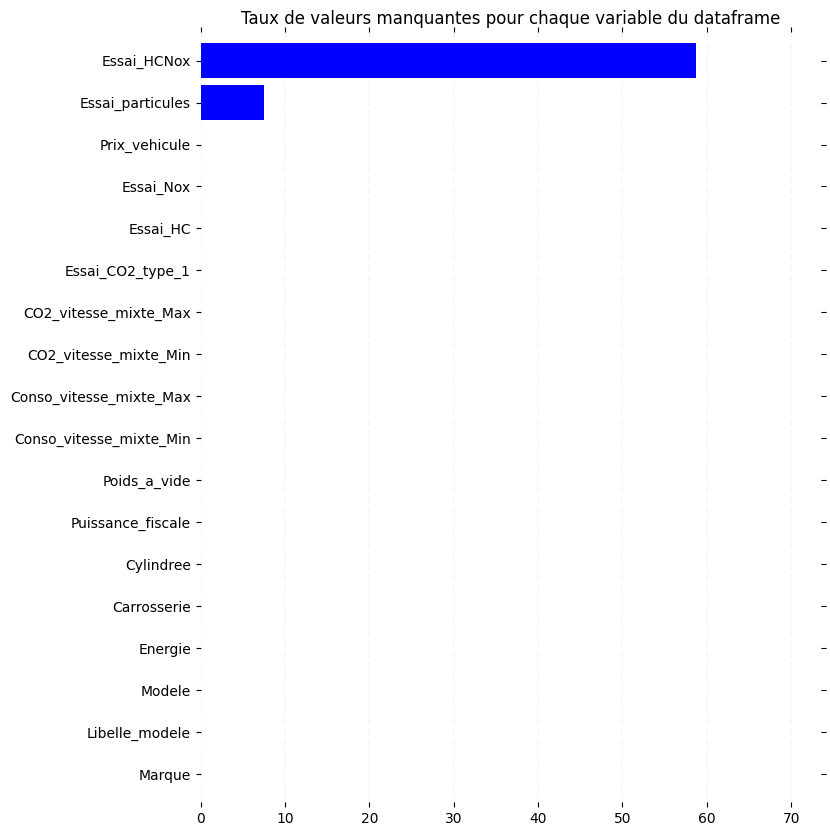

In [30]:
# Evaluation of the percentage of missing data

size = pollution.shape
nan_values = pollution.isna().sum()
nan_values = nan_values.sort_values(ascending=True)*100/size[0]

ax = nan_values.plot(kind='barh', 
                     figsize=(8, 10), 
                     color='#0000FF',
                     zorder=2,
                     width=0.85)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis="both", 
               which="both", 
               bottom="off", 
               top="off", 
               labelbottom="on", 
               left="off", 
               right="off", 
               labelleft="on")
ax.set_title("Taux de valeurs manquantes pour chaque variable du dataframe")
vals = ax.get_xticks()

for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

In [31]:
# Deletion of the 'Essai_HCNox' column containing more than 50% missing data.
pollution.drop('Essai_HCNox', axis=1, inplace=True)

In [32]:
pollution[pollution['Essai_particules'] == 0].count()

Marque                     5483
Libelle_modele             5483
Modele                     5483
Energie                    5483
Carrosserie                5483
Cylindree                  5483
Puissance_fiscale          5483
Poids_a_vide               5483
Conso_vitesse_mixte_Min    5483
Conso_vitesse_mixte_Max    5483
CO2_vitesse_mixte_Min      5483
CO2_vitesse_mixte_Max      5483
Essai_CO2_type_1           5483
Essai_HC                   5483
Essai_Nox                  5483
Essai_particules           5483
Prix_vehicule              5483
dtype: int64

In [33]:
# Deletion of the 'Essai_particules' column which contains very few values different from 0 in addition to 8% of missing values
pollution.drop('Essai_particules', axis=1, inplace=True)

In [43]:
pollution.shape

(7282, 19)

In [34]:
pollution['Marque'].value_counts()

Marque
B.M.W.        1730
MERCEDES       764
RENAULT        627
VOLKSWAGEN     608
MINI           458
SKODA          404
FORD           347
PEUGEOT        272
OPEL           199
FIAT           190
VOLVO          185
DACIA          166
KIA            162
PORSCHE        157
CITROEN        133
DS             101
HYUNDAI        100
ALFA_ROMEO      95
TOYOTA          85
NISSAN          85
SEAT            73
JEEP            72
LAND_ROVER      68
JAGUAR          56
CUPRA           43
HONDA           19
MAZDA           19
LEXUS           17
SUZUKI          16
ALPINE          16
AUDI            13
ROLLS_ROYC       2
MASERATI         2
Name: count, dtype: int64

You should know that NOx does not mainly affect the Global Warming Power (GWP) because these measurements do not include NO2 which will affect the Ozone layer. We will therefore cross-reference the GWP and air pollution values to compare thermal vehicles depending on whether they have a greater impact on health or global warming.

It should be kept in mind that these calculations must normally take into account other emissions which are not present in this dataframe.

In [35]:
print(pollution['Essai_Nox'].max())
print(pollution['Essai_Nox'].min())

0.077
0.001


In [36]:
# Calculation of Global Warming Power
pollution['PGR_CO2'] = pollution['Essai_CO2_type_1'] * 1
pollution['PGR_HC'] = pollution['Essai_HC'] * 25

pollution['PGR_cumul'] = pollution['PGR_HC'] + pollution['PGR_CO2']

In [30]:
pollution.head(10)

,Marque,Libelle_modele,Modele,Energie,Carrosserie,Cylindree,Puissance_fiscale,Poids_a_vide,Conso_vitesse_mixte_Min,Conso_vitesse_mixte_Max,CO2_vitesse_mixte_Min,CO2_vitesse_mixte_Max,Essai_CO2_type_1,Essai_HC,Essai_Nox,Prix_vehicule,PGR_CO2,PGR_HC,PGR_cumul
0,RENAULT,KANGOO,KANGOO,ESSENCE,COMBISPACE,1332,7,1519,6.656,7.871,150.86,178.42,0.234,0.012,0.022,31000,0.234,0.300,0.534
2,DS,DS_7_CROSSBACK,7_CROSSBACK,ELEC+ESSENC_HR,TS_TERRAINS/CHEMINS,1598,10,1760,1.271,1.797,28.71,40.60,0.460,0.015,0.016,57560,0.460,0.375,0.835
3,RENAULT,AUSTRAL,AUSTRAL,ESS+ELEC_HNR,TS_TERRAINS/CHEMINS,1199,7,1421,5.286,5.719,119.56,129.32,0.439,0.024,0.018,33000,0.439,0.600,1.039
4,B.M.W.,SERIE_2,218,ESSENCE,MONOSPACE_COMPACT,1499,7,1470,6.194,6.942,141.00,158.00,0.204,0.007,0.009,36688,0.204,0.175,0.379
5,RENAULT,KADJAR,KADJAR,ESSENCE,TS_TERRAINS/CHEMINS,1332,7,1353,6.229,6.714,141.00,152.00,0.162,0.015,0.013,33500,0.162,0.375,0.537
6,SKODA,OCTAVIA,OCTAVIA,GAZOLE,BERLINE,1968,8,1386,4.192,5.236,109.90,137.30,0.026,0.009,0.028,35218,0.026,0.225,0.251
7,B.M.W.,SERIE_X,X5,GAZ+ELEC_HNR,TS_TERRAINS/CHEMINS,2993,17,2190,6.510,7.484,170.40,195.90,0.141,0.018,0.045,79017,0.141,0.450,0.591
8,JEEP,COMPASS,COMPASS,ELEC+ESSENC_HR,TS_TERRAINS/CHEMINS,1332,10,1860,1.843,2.047,43.84,47.67,0.326,0.033,0.019,50100,0.326,0.825,1.151
9,RENAULT,ARKANA_E_TECH,ARKANA,ESS+ELEC_HNR,TS_TERRAINS/CHEMINS,1598,5,1435,4.814,5.024,108.70,113.70,0.383,0.020,0.003,35656,0.383,0.500,0.883
10,RENAULT,ARKANA,ARKANA,ESS+ELEC_HNR,TS_TERRAINS/CHEMINS,1332,7,1336,5.802,6.047,131.35,136.90,0.307,0.011,0.021,33288,0.307,0.275,0.582


In [37]:
pollution['Energie'].value_counts()

Energie
ESSENCE           2664
GAZOLE            2011
GAZ+ELEC_HNR       932
ESS+ELEC_HNR       897
ELEC+ESSENC_HR     539
ESS+G.P.L.         101
SUPERETHANOL        83
ELEC+GAZOLE_HR      55
GAZ_NAT.VEH          2
Name: count, dtype: int64

In [54]:
# With only two vehicles running on gas, we remove them because they are not representative.
pollution.drop(pollution[pollution['Energie'] == 'GAZ_NAT.VEH'].index, inplace=True)

# Replacing hybrid non-plug-in diesel by hybrid plug-in diesel
pollution.replace(to_replace=['GAZ+ELEC_HNR'], value='ELEC+GAZOLE_HR', inplace=True)

Whats type of Energy pollutes the least?

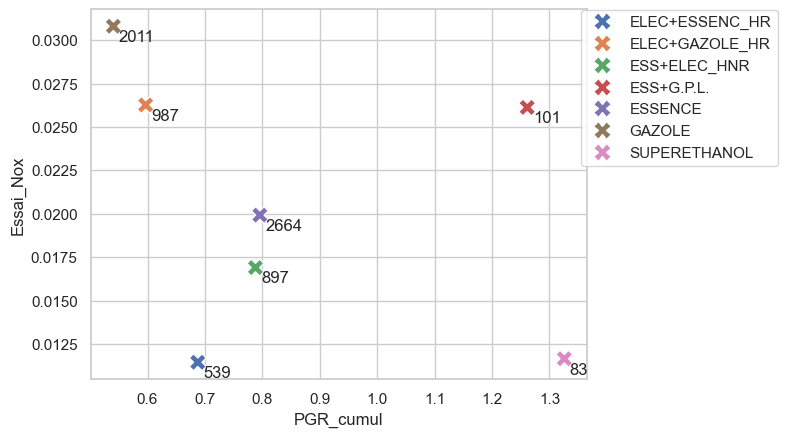

In [55]:
mean_point = pollution.groupby('Energie', as_index=False)[['PGR_cumul', 'Essai_Nox']].mean()
sns.scatterplot(x=mean_point['PGR_cumul'], y=mean_point['Essai_Nox'], hue=mean_point['Energie'], marker='X', s=150)
plt.legend(bbox_to_anchor=(1.40, 1.02), loc='upper right')
energie_counts = pollution['Energie'].value_counts()
ax = plt.gca()
for i, row in energie_counts.items():
    ax.annotate(str(row), xy=(mean_point.loc[mean_point['Energie'] == i, 'PGR_cumul'].values[0], mean_point.loc[mean_point['Energie'] == i, 'Essai_Nox'].values[0]), xytext=(4, -11), textcoords='offset points')

We can see that the best combination of Nox and PGR emissions are plug-in and non-plug-in hybrid gasoline vehicles, gasoline véhicules and diesel non-plug-in.

It seems that these would be the Plug_In Hybrid with a cumulative PGR having a median just below 4.
So what are the best-selling plug-in brands?

In [40]:
pollution[pollution['Energie'] == 'ELEC+ESSENC_HR']['Marque'].count()

np.int64(539)

In [41]:
pollution[pollution['Energie'] == 'ELEC+ESSENC_HR']['Marque'].value_counts()

Marque
VOLVO         98
MERCEDES      94
B.M.W.        92
PORSCHE       85
PEUGEOT       31
LAND_ROVER    26
DS            24
VOLKSWAGEN    23
JAGUAR        16
RENAULT       13
JEEP           7
AUDI           7
OPEL           5
FORD           5
CUPRA          5
KIA            4
SKODA          2
MAZDA          2
Name: count, dtype: int64

In [56]:
select_HR = pollution[pollution['Energie'] == 'ELEC+ESSENC_HR']
select_HNR = pollution[pollution['Energie'] == 'ESS+ELEC_HNR']
select_ESSENCE = pollution[pollution['Energie'] == 'ESSENCE']
select_GAZOLE_HR = pollution[pollution['Energie'] == 'ELEC+GAZOLE_HR']

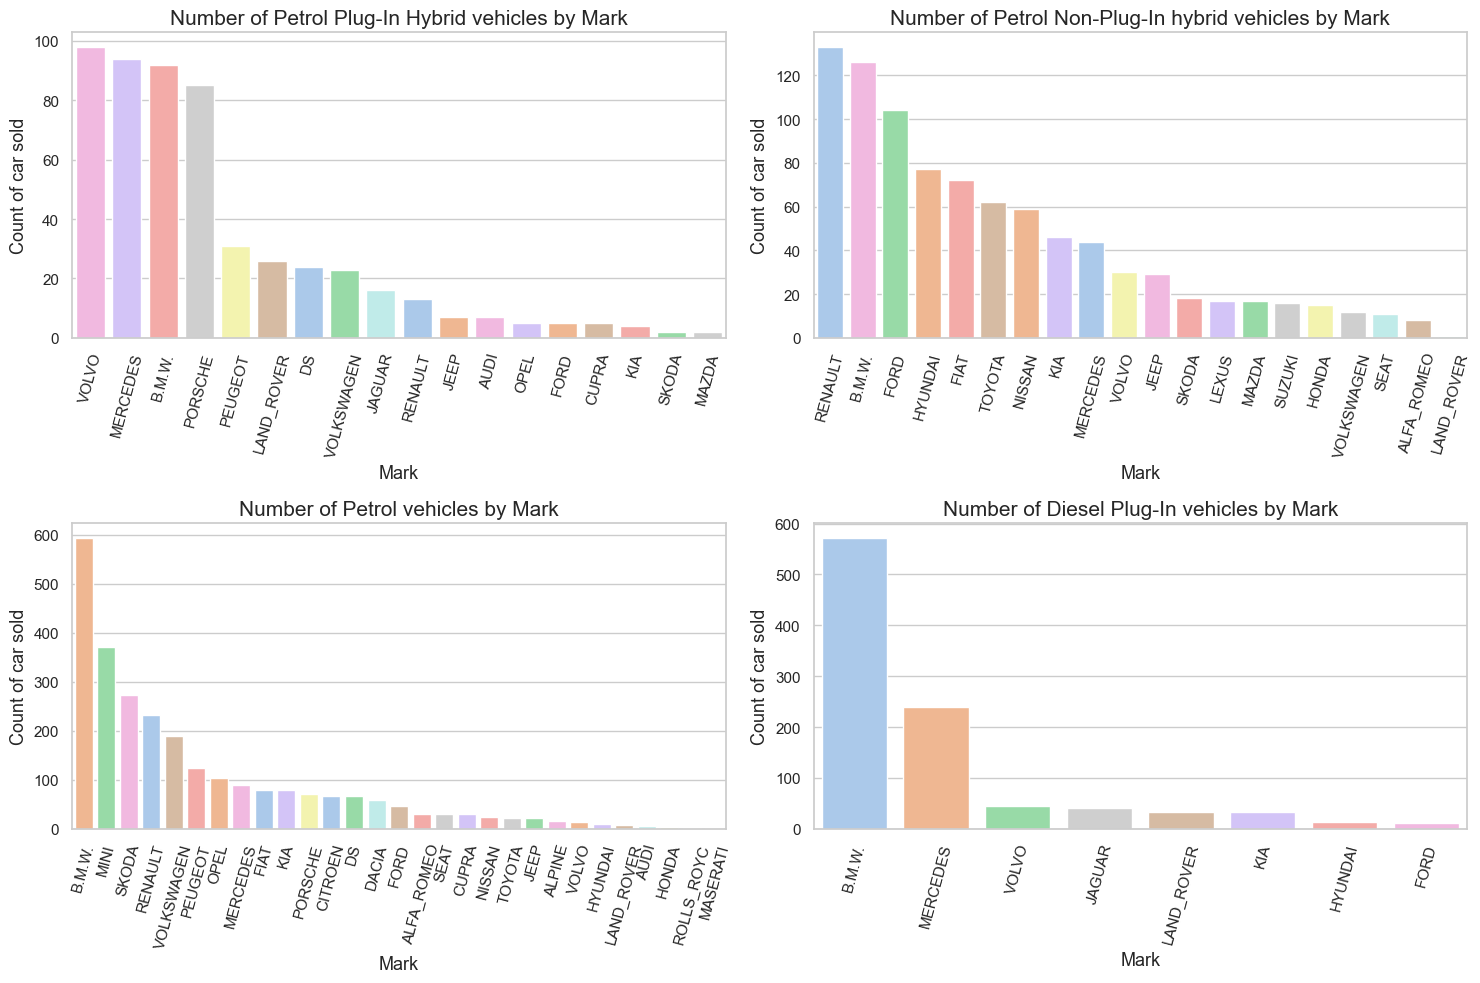

In [65]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
sns.set_theme(style='whitegrid')

sns.countplot(data=select_HR, x='Marque', order= select_HR['Marque'].value_counts().index, hue='Marque', palette='pastel', legend=False, ax = axes[0,0])
axes[0,0].tick_params(axis='x', rotation=75)
axes[0,0].set_ylabel('Count of car sold', fontsize=13)
axes[0,0].set_xlabel('Mark', fontsize=13)
axes[0,0].set_title("Number of Petrol Plug-In Hybrid vehicles by Mark", fontsize= 15)
sns.countplot(data=select_HNR, x='Marque', order= select_HNR['Marque'].value_counts().index, hue='Marque', palette='pastel', legend=False, ax = axes[0,1])
axes[0,1].tick_params(axis='x', rotation=75)
axes[0,1].set_ylabel('Count of car sold', fontsize=13)
axes[0,1].set_xlabel('Mark', fontsize=13)
axes[0,1].set_title("Number of Petrol Non-Plug-In hybrid vehicles by Mark", fontsize= 15)
sns.countplot(data=select_ESSENCE, x='Marque', order= select_ESSENCE['Marque'].value_counts().index, hue='Marque', palette='pastel', legend=False, ax = axes[1,0])
axes[1,0].tick_params(axis='x', rotation=75)
axes[1,0].set_ylabel('Count of car sold', fontsize=13)
axes[1,0].set_xlabel('Mark', fontsize=13)
axes[1,0].set_title("Number of Petrol vehicles by Mark", fontsize= 15)
sns.countplot(data=select_GAZOLE_HR, x='Marque', order= select_GAZOLE_HR['Marque'].value_counts().index, hue='Marque', palette='pastel', legend=False, ax = axes[1,1])
axes[1,1].tick_params(axis='x', rotation=75)
axes[1,1].set_ylabel('Count of car sold', fontsize=13)
axes[1,1].set_xlabel('Mark', fontsize=13)
axes[1,1].set_title("Number of Diesel Plug-In vehicles by Mark", fontsize= 15)

plt.tight_layout()
plt.show()

Note that the 3 brands that sold the most petrol or diesel plug-in vehicles are Volvo, Mercedes and BMW.
For non-plug-in petrol vehicles, it's Renault, BMW and Ford.
And for petrol vehicles : BMW, Mini and Skoda


What are their respective PGR_cumul?
(Did you see that BMW is on the 3 firsts of all type vehicles?)

C:\Users\lecow\AppData\Local\Temp\ipykernel_9136\3201804712.py:4: FutureWarning: The provided callable <function mean at 0x0000011C253CD620> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  result_HR = select_HR.groupby(["Marque"])['PGR_cumul'].aggregate(np.mean).reset_index().sort_values('PGR_cumul')
C:\Users\lecow\AppData\Local\Temp\ipykernel_9136\3201804712.py:18: FutureWarning: The provided callable <function mean at 0x0000011C253CD620> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  result_HNR = select_HNR.groupby(["Marque"])['PGR_cumul'].aggregate(np.mean).reset_index().sort_values('PGR_cumul')
C:\Users\lecow\AppData\Local\Temp\ipykernel_9136\3201804712.py:32: FutureWarning: The provided callable <function mean at 0x0000011C253CD620>

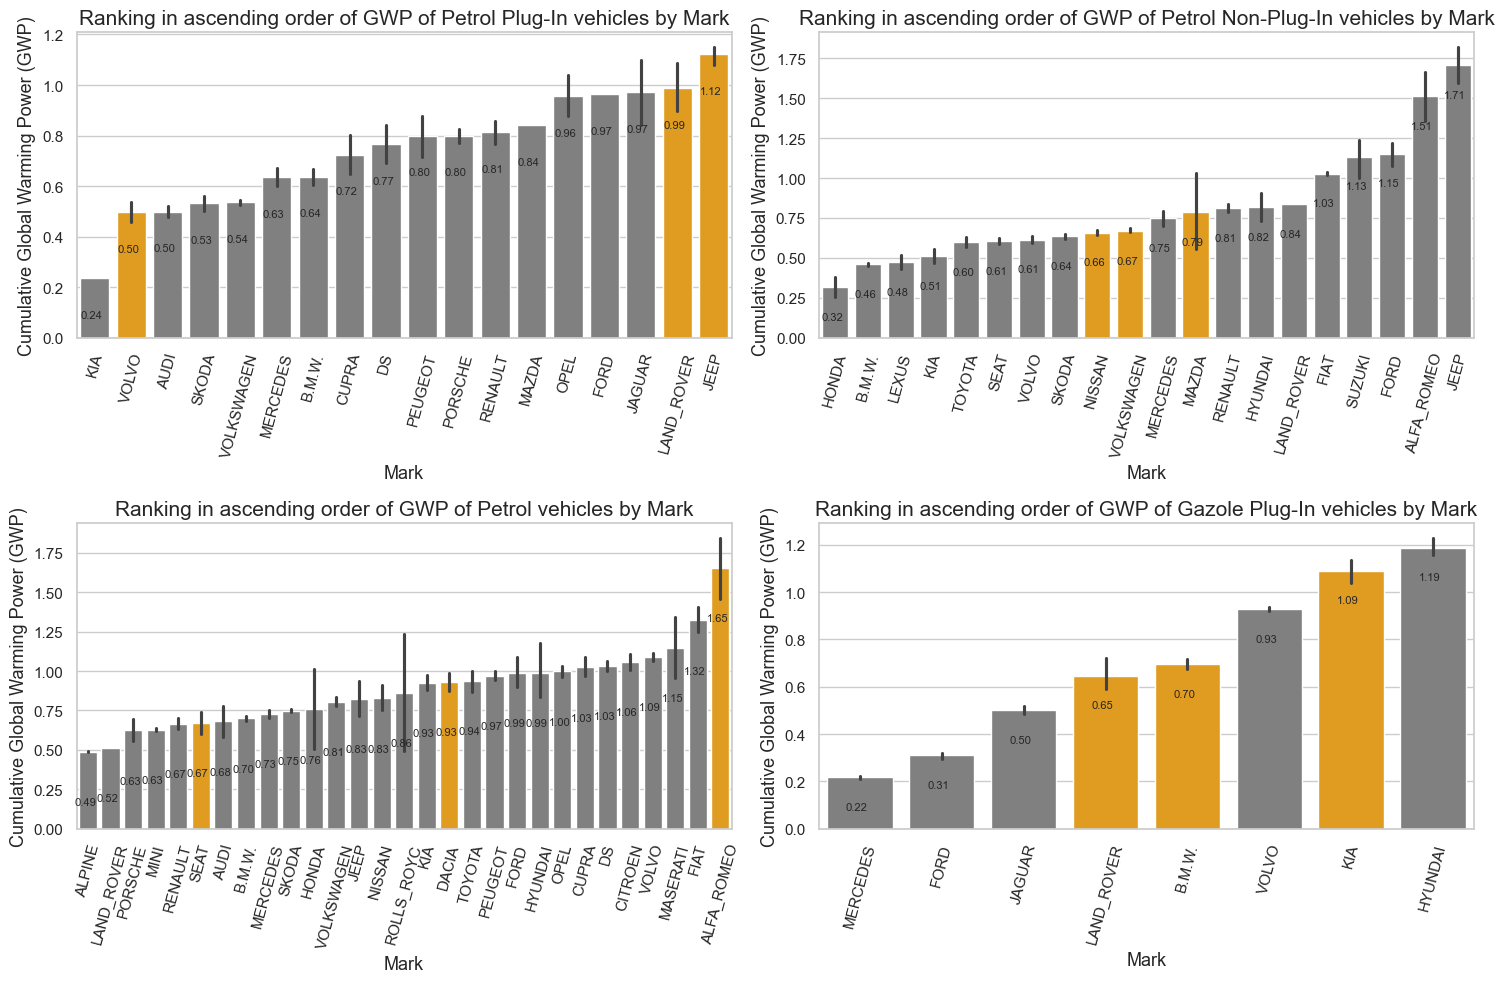

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
sns.set_theme(style='whitegrid')

result_HR = select_HR.groupby(["Marque"])['PGR_cumul'].aggregate(np.mean).reset_index().sort_values('PGR_cumul')
colored_marques = ['VOLVO', 'MERCEDES', 'B.M.W.']
pal_col_HR = ['orange' if marque in colored_marques else 'grey' for marque in result_HR['Marque'].unique()]

sns.barplot(data=select_HR, x='Marque', y='PGR_cumul', hue='Marque', palette=pal_col_HR, legend=False, order=result_HR['Marque'], ax=axes[0,0])
axes[0,0].tick_params(axis='x', rotation=75)
axes[0,0].set_ylabel('Cumulative Global Warming Power (GWP)', fontsize=13)
axes[0,0].set_xlabel('Mark', fontsize=13)
axes[0,0].set_title("Ranking in ascending order of GWP of Petrol Plug-In vehicles by Mark", fontsize= 15)
ax = plt.gca()
for p in axes[0,0].patches:
    axes[0,0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='left', va='bottom', xytext=(-10, -30), textcoords='offset points', fontsize=8)
    
result_HNR = select_HNR.groupby(["Marque"])['PGR_cumul'].aggregate(np.mean).reset_index().sort_values('PGR_cumul')
colored_marques_HNR = ['RENAULT', 'B.M.W.', 'FORD']
pal_col_HNR = ['orange' if marque in colored_marques_HNR else 'grey' for marque in result_HNR['Marque'].unique()]

sns.barplot(data=select_HNR, x='Marque', y='PGR_cumul', hue='Marque', palette=pal_col_HNR, legend=False, order=result_HNR['Marque'], ax=axes[0,1])
axes[0,1].tick_params(axis='x', rotation=75)
axes[0,1].set_ylabel('Cumulative Global Warming Power (GWP)', fontsize=13)
axes[0,1].set_xlabel('Mark', fontsize=13)
axes[0,1].set_title("Ranking in ascending order of GWP of Petrol Non-Plug-In vehicles by Mark", fontsize= 15)
ax = plt.gca()
for p in axes[0,1].patches:
    axes[0,1].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='left', va='bottom', xytext=(-10, -25), textcoords='offset points', fontsize=8)
    
result_Petrol = select_ESSENCE.groupby(["Marque"])['PGR_cumul'].aggregate(np.mean).reset_index().sort_values('PGR_cumul')
colored_marques_Petrol = ['B.M.W.', 'MINI', 'SKODA']
pal_col_Petrol = ['orange' if marque in colored_marques_Petrol else 'grey' for marque in result_Petrol['Marque'].unique()]

sns.barplot(data=select_ESSENCE, x='Marque', y='PGR_cumul', hue='Marque', palette=pal_col_Petrol, legend=False, order=result_Petrol['Marque'], ax=axes[1,0])
axes[1,0].tick_params(axis='x', rotation=75)
axes[1,0].set_ylabel('Cumulative Global Warming Power (GWP)', fontsize=13)
axes[1,0].set_xlabel('Mark', fontsize=13)
axes[1,0].set_title("Ranking in ascending order of GWP of Petrol vehicles by Mark", fontsize= 15)
ax = plt.gca()
for p in axes[1,0].patches:
    axes[1,0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='left', va='bottom', xytext=(-10, -40), textcoords='offset points', fontsize=8)

result_Gaz_HNR = select_GAZOLE_HR.groupby(["Marque"])['PGR_cumul'].aggregate(np.mean).reset_index().sort_values('PGR_cumul')
colored_marques_Gazole = ['B.M.W.', 'MERCEDES', 'VOLVO']
pal_col_Gazole = ['orange' if marque in colored_marques_Gazole else 'grey' for marque in result_Gaz_HNR['Marque'].unique()]

sns.barplot(data=select_GAZOLE_HR, x='Marque', y='PGR_cumul', hue='Marque', palette=pal_col_Gazole, legend=False, order=result_Gaz_HNR['Marque'], ax=axes[1,1])
axes[1,1].tick_params(axis='x', rotation=75)
axes[1,1].set_ylabel('Cumulative Global Warming Power (GWP)', fontsize=13)
axes[1,1].set_xlabel('Mark', fontsize=13)
axes[1,1].set_title("Ranking in ascending order of GWP of Gazole Plug-In vehicles by Mark", fontsize= 15)
ax = plt.gca()
for p in axes[1,1].patches:
    axes[1,1].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='left', va='bottom', xytext=(-10, -25), textcoords='offset points', fontsize=8)    

plt.tight_layout()
plt.show()

# Observations : 
- We can observe that the brands selling the most Petrol Plug-In vehicules, are in the top ranks of the GWP.
- Conversely, for non-plug-in petrol vehicles, the 3 best-selling brands are rather at the back of the GWP ranking (except BMW).
- For petrol vehicles, the best-selling brands are among those with the lowest GWP.
- And for Non-Plug-In Diesel vehicules, even if few brands have developed this type of engine, we can observe that the 3 best-selling brands in this branch are not the ones with the lowest GWP (except Mercedes).
- Petrol and diesel vehicles are the most sold and yet they are not the least polluting vehicles.
- Followed by Plug-In Hybrid diesel and gasoline vehicles.

Conclusions : 
- Consumers do not necessarily buy the less polluting vehicles since it remains diesel or gasoline vehicles which are the most sold.
- Consumers do not buy the least polluting vehicles in the same sector : the best-selling Non-Plug-In Hybrid vehicles are among the most polluting.

# Openings : 
- This dataset does not take into account all pollutants emitted during vehicle use. emissions for manufacturing, pollutants from tire wear, brakes, N2O, etc... And is therefore only an estimate which could vary depending on the addition of all polluting emissions known to date . (see 4th IPCC report of 2007)
- Some brands are poorly represented and their GWP and NOx emissions values may be biased.
- The sales figures are not representative of actual sales in France. (BMW 1st seller in the dataset, while French brands are the most sold in France according to new registrations in the territory) (cf : https://pfa-auto.fr/2023/04/01/marche-automobile-francais-mars-2023/)
- We do not have the period covered for the creation of this dataset, nor where these values come from (did all French dealerships include or only the registration service?).
- It might also be interesting to include the type and price of vehicle sold to observe what attracts buyers the most.